In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Funções

In [8]:
def f1(x):
    return x**2 - 1

def f2(x):
    return x**4 - x**2

def f3(x):
    return x**4 - x**2 + x/4  # função 2 com uma reta.

def grad_f1(x):
    return 2*x

def grad_f2(x):
    return 4*x**3 - 2*x

def grad_f3(x):
    return 4*x**3 - 2*x + 1/4  #derivada de f3

def gradient_descent(f, grad_f, x0, alpha, steps, max_step=2.0):
    x_values = [x0]
    for _ in range(steps):
        step = -alpha * grad_f(x_values[-1])
        step = np.clip(step, -max_step, max_step)  # Limita o tamanho do passo
        x_new = x_values[-1] + step
        x_values.append(x_new)
    return np.array(x_values)


# Configurações

In [9]:

x = np.linspace(-2, 2, 400)
x0 = 1.05 
alpha_small = 0.05  # Super parâmetro pequeno
alpha_large = 0.9 # Super parâmetro grande
steps = 1000  # Número de iterações


# Cálculo do gradiente descendente

In [10]:

x_vals_f1_small = gradient_descent(f1, grad_f1, x0, alpha_small, steps)
x_vals_f1_large = gradient_descent(f1, grad_f1, x0, alpha_large, steps)
x_vals_f2_small = gradient_descent(f2, grad_f2, x0, alpha_small, steps)
x_vals_f2_large = gradient_descent(f2, grad_f2, x0, alpha_large, steps)
x_vals_f3_small = gradient_descent(f3, grad_f3, x0, alpha_small, steps)
x_vals_f3_large = gradient_descent(f3, grad_f3, x0, alpha_large, steps)


# Plotagem dos Gráficos

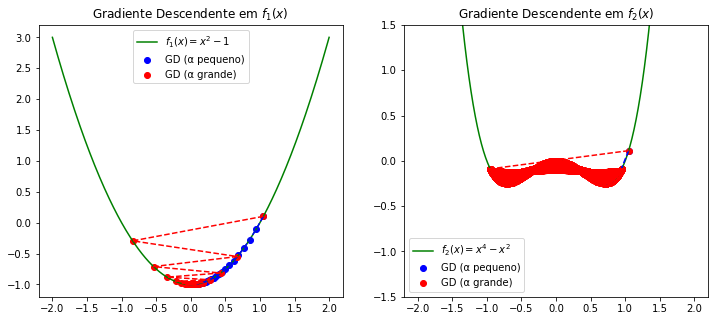

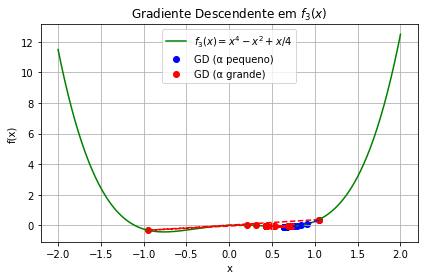

In [11]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico f1(x)
axes[0].plot(x, f1(x), 'g-', label='$f_1(x) = x^2 - 1$')
axes[0].scatter(x_vals_f1_small, f1(x_vals_f1_small), color='blue', label='GD (α pequeno)')
axes[0].scatter(x_vals_f1_large, f1(x_vals_f1_large), color='red', label='GD (α grande)')
axes[0].plot(x_vals_f1_small, f1(x_vals_f1_small), 'b--')
axes[0].plot(x_vals_f1_large, f1(x_vals_f1_large), 'r--')
axes[0].set_title("Gradiente Descendente em $f_1(x)$")
axes[0].legend()

# Gráfico f2(x)
axes[1].plot(x, f2(x), 'g-', label='$f_2(x) = x^4 - x^2$')
axes[1].set_ylim(-1.5, 1.5)
axes[1].scatter(x_vals_f2_small, f2(x_vals_f2_small), color='blue', label='GD (α pequeno)')
axes[1].scatter(x_vals_f2_large, f2(x_vals_f2_large), color='red', label='GD (α grande)')
axes[1].plot(x_vals_f2_small, f2(x_vals_f2_small), 'b--')
axes[1].plot(x_vals_f2_large, f2(x_vals_f2_large), 'r--')
axes[1].set_title("Gradiente Descendente em $f_2(x)$")
axes[1].legend()

plt.figure(figsize=(6, 4))
plt.plot(x, f3(x), 'g-', label='$f_3(x) = x^4 - x^2 + x/4$')
plt.scatter(x_vals_f3_small, f3(x_vals_f3_small), color='blue', label='GD (α pequeno)')
plt.scatter(x_vals_f3_large, f3(x_vals_f3_large), color='red', label='GD (α grande)')
plt.plot(x_vals_f3_small, f3(x_vals_f3_small), 'b--')
plt.plot(x_vals_f3_large, f3(x_vals_f3_large), 'r--')
plt.title("Gradiente Descendente em $f_3(x)$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()



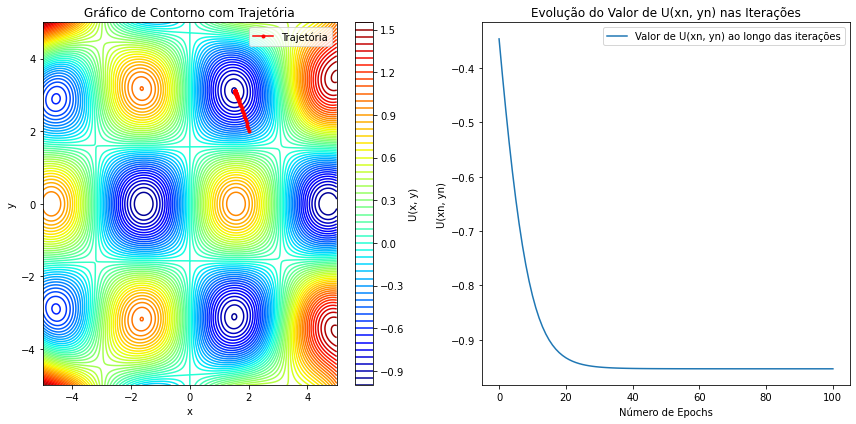

In [12]:
# Função U(x, y)
def U(x, y):
    return np.sin(x)*np.cos(y) + (2*(x*y)**2)/1000

# Gradiente de U(x, y)
def grad_U(x, y):
    # Derivadas parciais de U em relação a x e y
    dU_dx = np.cos(x)*np.cos(y) + (4*x*y*2)/1000
    dU_dy = -np.sin(x)*np.sin(y) + (4*x*2*y)/1000
    return np.array([dU_dx, dU_dy])

# Algoritmo de Gradiente Descendente
def gradient_descent(U, grad_U, x0, y0, alpha, epochs):
    x, y = x0, y0
    trajectory = [(x, y)]
    U_values = [U(x, y)]

    for _ in range(epochs):
        grad = grad_U(x, y)
        x -= alpha * grad[0]
        y -= alpha * grad[1]
        trajectory.append((x, y))
        U_values.append(U(x, y))

    return np.array(trajectory), np.array(U_values)

# Parâmetros
x0, y0 = 2, 2  # Posição inicial
alpha = 0.1    # Taxa de aprendizado
epochs = 100    # Número de iterações

# Gerando os dados de trajetória e valores de U
trajectory, U_values = gradient_descent(U, grad_U, x0, y0, alpha, epochs)

# Geração do gráfico de contorno com a trajetória
x_vals = np.linspace(-5, 5, 400)
y_vals = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = U(X, Y)

plt.figure(figsize=(12, 6))

# Gráfico de Contorno (1)
plt.subplot(1, 2, 1)
plt.contour(X, Y, Z, 50, cmap='jet')
plt.colorbar(label="U(x, y)")
plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', color='r', markersize=3, label="Trajetória")
plt.title("Gráfico de Contorno com Trajetória")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Gráfico do Valor de U(xn, yn) (2)
plt.subplot(1, 2, 2)
plt.plot(U_values, label="Valor de U(xn, yn) ao longo das iterações")
plt.title("Evolução do Valor de U(xn, yn) nas Iterações")
plt.xlabel("Número de Epochs")
plt.ylabel("U(xn, yn)")
plt.legend()

plt.tight_layout()
plt.show()